# Installing libraries 

In [1]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install python-utils

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
deepchem 2.7.2.dev20230329235727 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.


#  importing libraries 

In [115]:
import shap

In [116]:
import torch
from torchvision import transforms
import sys
sys.path.append('../input/yolov7-lib/yolov7-main')
#from utils.datasets import letterbox
#from utils.general import non_max_suppression_kpt
#from utils.plots import output_to_keypoint, plot_skeleton_kpts

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm
from sklearn import preprocessing
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Reading dataset
import os
from os import walk
for (dirpath, dirnames, filenames) in walk("D:/Desktop/YOGA/content/cleaned/DATASET"):
    print("Directory path: ", dirpath)

Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST\downdog
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST\goddess
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST\plank
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST\tree
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TEST\warrior2
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN\downdog
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN\goddess
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN\plank
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN\tree
Directory path:  D:/Desktop/YOGA/content/cleaned/DATASET\TRAIN\warrior2


# Reading train and test datasets

In [117]:
train_path = "D:/Desktop/YOGA/content/cleaned/DATASET/TRAIN"
test_path = "D:/Desktop/YOGA/content/cleaned/DATASET/TEST"

In [118]:
train_path

'D:/Desktop/YOGA/content/cleaned/DATASET/TRAIN'

# Visualizing data

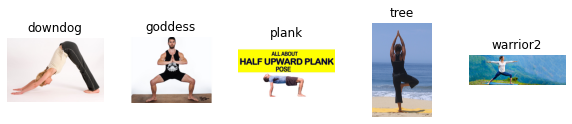

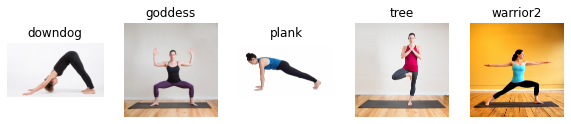

In [119]:
from tensorflow.keras.preprocessing.image import load_img
def plot_images(path):
    count = 1
    fig = plt.figure(figsize=(10, 10))
    for i in os.listdir(path):
            f_path = os.path.join(path,i)
            fig.add_subplot(5,5,count)
            plt.imshow(load_img(f"{os.path.join(f_path,os.listdir(f_path)[0])}"))
            plt.axis('off')
            plt.title(f'{i}')
            count+=1
    plt.show()
plot_images(train_path)
plot_images(test_path)

# preprocessing images

converting images from BGR color-space to the YCRCb color -space
The difference between YCbCr and RGB is that YCbCr represents color as brightness and two color difference signals, while RGB represents color as red, green and blue. In YCbCr, the Y is the brightness (luma), Cb is blue minus luma (B-Y) and Cr is red minus luma (R-Y)

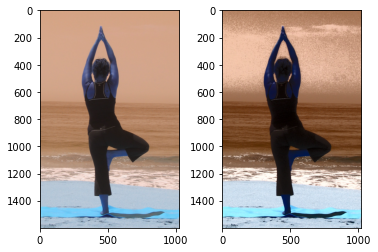

In [120]:
bgr_img = cv2.imread(train_path+'/tree/00000070.jpg')

# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)
 # equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

plt.subplot(121),plt.imshow(bgr_img)

plt.subplot(122),plt.imshow(equalized_img)
plt.show()

The purpose of this code is to apply histogram equalization to the Y channel of the YCrCb color space. Histogram equalization is a technique used to enhance the contrast of an image by spreading out the intensity values in the image's histogram. In this case, only the Y channel is equalized because it represents the brightness component of the image.


the histogram of the Y channel of the image is equalized using OpenCV's equalizeHist function. This function applies histogram equalization to a single channel of an image by mapping the original pixel values to new values that have a more uniform distribution. After the equalization, the Y channel contains a more balanced range of pixel values, which can enhance the contrast of the image and reveal more details in both bright and dark areas.

Finally, the image is converted back to the BGR color space using OpenCV's cvtColor function so that it can be displayed with matplotlib.

# Applying Contrast Limited Adaptive Histogram Equalization (CLAHE) to equalize images

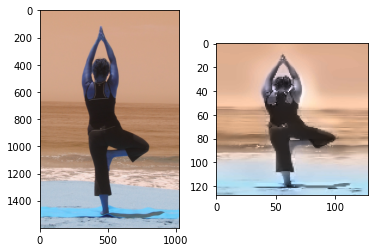

In [121]:
bgr_img = cv2.imread(train_path+'/tree/00000070.jpg')
# dsize
dsize = (128,128)
resized_image = cv2.resize(bgr_img,dsize)
# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
# create a CLAHE object 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Now apply on the YCrCb image 
ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

# Denoise is done to remove unwanted noise to better perform
equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(bgr_img)
plt.subplot(122),plt.imshow(equalized_denoised_image)
plt.show()

This code block reads an image file in the BGR color space using OpenCV's imread function, resizes it to a size of 128x128 pixels using OpenCV's resize function, and then applies several image processing techniques to prepare it for use in a machine learning model for yoga pose detection.

After resizing, the image is converted from the BGR color space to the YCrCb color space using OpenCV's cvtColor function. The Y channel of the image is then equalized using OpenCV's createCLAHE and apply functions. CLAHE stands for Contrast Limited Adaptive Histogram Equalization, which is a variation of the histogram equalization technique that limits the amplification of pixel values in areas with high contrast to prevent over-amplification and clipping. In this case, clipLimit=2.0 sets the upper limit for the contrast enhancement, and tileGridSize=(8,8) specifies the size of the grid for dividing the image into smaller regions.

After the Y channel equalization, the image is converted back to the BGR color space using OpenCV's cvtColor function, and denoising is applied using OpenCV's fastNlMeansDenoisingColored function. Denoising is a technique used to remove unwanted noise from the image, which can improve the performance of machine learning models by reducing the amount of irrelevant information in the image.

Finally, the original BGR image and the denoised and equalized BGR image are shown side by side using matplotlib's subplot and imshow functions.

Overall, this code block performs several preprocessing steps to enhance the quality of the image and remove unwanted noise, which can help improve the accuracy of the machine learning model for yoga pose detection.

CLAHE stands for Contrast Limited Adaptive Histogram Equalization. It is a variant of the histogram equalization technique that enhances the contrast of an image by redistributing the intensity values of the image. The aim is to improve the visibility of the image details in areas with low contrast. However, traditional histogram equalization techniques can sometimes lead to over-amplification of pixel values in areas with high contrast, which can cause the image to look unnatural and cause clipping in some cases.

CLAHE is designed to overcome this limitation by using a more adaptive approach to histogram equalization. It divides the image into smaller regions called tiles and applies histogram equalization separately to each tile. This way, the algorithm can limit the amplification of pixel values in areas with high contrast within each tile, preventing over-amplification and clipping. Additionally, the algorithm applies a contrast threshold, limiting the contrast enhancement for each pixel.

The createCLAHE function in OpenCV creates a CLAHE object with user-defined parameters such as the clip limit and tile size. The apply function then applies the CLAHE algorithm to the input image. By applying CLAHE to the Y channel of an image in the YCrCb color space, we can enhance the contrast of the image while preserving the color information.

In the context of the yoga pose detection notebook, CLAHE is used to enhance the contrast of the resized and converted image before further preprocessing steps are applied. This can help improve the accuracy of the deep learning model by improving the visibility of image details and reducing the impact of low contrast and noise in the image.

The main difference between CLAHE and equalizeHist is the way they perform histogram equalization on an image.

equalizeHist performs global histogram equalization on the entire image, which means that it applies the same histogram equalization to all pixels in the image. This can sometimes lead to over-amplification of pixel values in areas with high contrast, which can cause the image to look unnatural and cause clipping in some cases. Additionally, it doesn't take into account the local contrast of different regions in the image, which can result in poor contrast enhancement for certain regions.

On the other hand, CLAHE performs adaptive histogram equalization by dividing the image into smaller regions called tiles and applies histogram equalization separately to each tile. This way, the algorithm can limit the amplification of pixel values in areas with high contrast within each tile, preventing over-amplification and clipping. Additionally, the algorithm applies a contrast threshold, limiting the contrast enhancement for each pixel.

In summary, equalizeHist is a simpler method that applies the same histogram equalization to all pixels in the image, while CLAHE is a more advanced technique that performs adaptive histogram equalization on smaller regions of the image, which can help to enhance the contrast of an image while preserving the local contrast information.

# Combining both previous traitement in one fonction for all the images

In [122]:
def preprocess_images(dataset_path):
    images_data = []
    images_label = []
    class_names = os.listdir(dataset_path)
    for class_name in class_names:
        images_path = dataset_path + '/' + class_name
        images = os.listdir(images_path)
        for image in images:
            bgr_img = cv2.imread(images_path + '/' + image)
            # dsize
            dsize = (64,64)
            #resize image
            resized_image = cv2.resize(bgr_img,dsize)
            # convert from BGR color-space to YCrCb
            ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
            # create a CLAHE object 
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            # Now apply CLAHE object on the YCrCb image
            ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
                   # convert back to BGR color-space from YCrCb
            equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
            # Denoise is done to remove unwanted noise to better perform
            equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)
            
            images_data.append(equalized_denoised_image/255)
            images_label.append(class_name)
    images_data = np.array(images_data)
    images_label = np.array(images_label)
    return images_data, images_label

The function essentially resizes the image, improves its contrast using CLAHE, removes noise using denoising, and normalizes its pixel values. These steps are common in many computer vision tasks and can help improve the accuracy of the deep learning model

In [123]:
train_images_data, train_images_label = preprocess_images(train_path)

These preprocessed images and labels will be used to train the deep learning model.

In [124]:
train_images_label

array(['downdog', 'downdog', 'downdog', ..., 'warrior2', 'warrior2',
       'warrior2'], dtype='<U8')

In [125]:
train_df = pd.DataFrame({
    'image_data': train_images_data.tolist(),
    'label': train_images_label.tolist()
})

In [126]:
train_df

,image_data,label
0,"[[[0.9686274509803922, 0.9607843137254902, 0.9...",downdog
1,"[[[0.996078431372549, 0.996078431372549, 0.996...",downdog
2,"[[[0.5686274509803921, 0.996078431372549, 0.99...",downdog
3,"[[[0.8980392156862745, 0.9450980392156862, 0.9...",downdog
4,"[[[0.8196078431372549, 0.8313725490196079, 0.5...",downdog
...,...,...
1070,"[[[0.9490196078431372, 0.9490196078431372, 0.9...",warrior2
1071,"[[[0.8862745098039215, 0.7686274509803922, 0.5...",warrior2
1072,"[[[0.03529411764705882, 0.03137254901960784, 0...",warrior2
1073,"[[[0.996078431372549, 0.996078431372549, 0.996...",warrior2


# Visualizing the distribution of classes

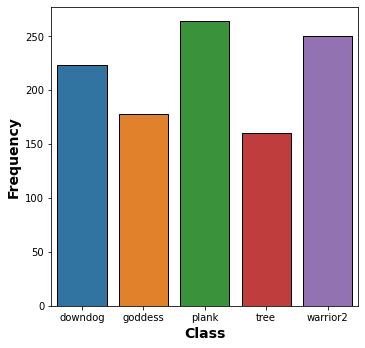

In [127]:
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='label', data=train_df, edgecolor='black')

plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_Image_class.pdf')

# Encoding

In [128]:
 def encoding_targets(labels):
    le = preprocessing.LabelEncoder()
    images_label = le.fit_transform(labels)
    return images_label

The function returns the encoded labels as a numpy array.

In [129]:
class_names = os.listdir(train_path)
class_num = len(class_names)
train_images_label = encoding_targets(train_images_label)

In [130]:
test_images_data, test_images_label = preprocess_images(test_path)
test_images_label = encoding_targets(test_images_label)

This block of code is assigning each class name to a list class_names and then getting the length of that list to determine the number of classes in the dataset class_num.

The second line is calling the encoding_targets function to convert the class labels from strings to integers.

# CNN model using the Keras API of TensorFlow.

In [83]:
modelCNN = tf.keras.Sequential([
        tfl.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)),
        tfl.MaxPool2D(pool_size=(2,2)),
        tfl.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tfl.BatchNormalization(axis=-1),
        tfl.Dropout(rate=0.25),
        
    
        tfl.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        tfl.MaxPool2D(pool_size=(2,2)),
        tfl.BatchNormalization(axis=-1),
        tfl.Dropout(rate=0.25),    
        
    
        tfl.Flatten(),
        tfl.Dense(512,activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(rate=0.5),  
        tfl.Dense(class_num, activation='softmax')
        
])
modelCNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 27, 27, 64)       

CNN model using the Keras API of TensorFlow. The model architecture is as follows:

1)The first layer is a 2D convolutional layer with 16 filters, a kernel size of (3,3), and ReLU activation function. The input shape is (64,64,3) which means the input is a 64x64 color image (3 channels: red, green, and blue).

2)The second layer is a max-pooling layer with a pool size of (2,2) which reduces the dimensionality of the output from the previous layer.

3)The third layer is another 2D convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation function.

4)The fourth layer is a batch normalization layer which normalizes the activations of the previous layer across the batch dimension.

5)The fifth layer is a dropout layer which randomly sets a fraction (25%) of the input units to 0 at each update during training time, which helps prevent overfitting.

6)The sixth layer is another 2D convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function.
7)The seventh layer is a max-pooling layer with a pool size of (2,2) which reduces the dimensionality of the output from the previous layer.

8)The eighth layer is a batch normalization layer which normalizes the activations of the previous layer across the batch dimension.

9)The ninth layer is a dropout layer which randomly sets a fraction (25%) of the input units to 0 at each update during training time, which helps prevent overfitting.

10)The tenth layer is a flatten layer which flattens the output of the previous layer into a 1D array.

11)The eleventh layer is a dense layer with 512 units and ReLU activation function.

12)The twelfth layer is a batch normalization layer which normalizes the activations of the previous layer across the batch dimension.

13)The thirteenth layer is a dropout layer which randomly sets a fraction (50%) of the input units to 0 at each update during training time, which helps prevent overfitting.

14)The fourteenth layer is a dense layer with a number of units equal to the number of classes in the dataset and softmax activation function which generates class probabilities for each input image.
The model has a total of 1,405,546 trainable parameters.

In [84]:
modelCNN.output

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_9')>

In [134]:
from tensorflow.keras.optimizers.legacy import Adam

In [135]:
epochs = 20
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
modelCNN.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In this block of the notebook, the model is compiled using the specified optimizer, loss function, and evaluation metric.

Adam is used as the optimizer with a learning rate of 0.001. Adam is a popular optimization algorithm that combines the advantages of Adagrad and RMSprop. It is well-suited for training deep neural networks and is efficient in terms of memory usage and computation time.

sparse_categorical_crossentropy is used as the loss function. This is a variant of categorical cross-entropy loss that is used when the labels are integers (as opposed to one-hot encoded vectors).

The accuracy metric is used to evaluate the performance of the model during training and testing. The accuracy metric computes the proportion of correct predictions over the total number of predictions.

# Model's summary

In [87]:
# Print the model summary
modelCNN.summary()

# Train the model
history = modelCNN.fit(train_images_data, train_images_label, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = modelCNN.evaluate(test_images_data, test_images_label)
print('Test accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 27, 27, 64)       

# Confusion Matrix

In [89]:
test_images_data, test_images_label = preprocess_images(test_path)
test_images_label = encoding_targets(test_images_label)
predict = np.argmax(modelCNN.predict(np.array(test_images_data)),axis=1)
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrixCNN = confusion_matrix(test_images_label, predict)
print(cnf_matrixCNN)
print("\nClassification Report :")
print(classification_report(test_images_label, predict, target_names=class_names))

15/15 [==============================] - 1s 21ms/step
Test Data accuracy:  65.87982832618026

Confusion Matrix : 
[[ 28   5  59   0   5]
 [  0  42  19   2  14]
 [  0   0 114   0   0]
 [  0   2   5  61   1]
 [  0  23  23   1  62]]

Classification Report :
              precision    recall  f1-score   support

     downdog       1.00      0.29      0.45        97
     goddess       0.58      0.55      0.56        77
       plank       0.52      1.00      0.68       114
        tree       0.95      0.88      0.92        69
    warrior2       0.76      0.57      0.65       109

    accuracy                           0.66       466
   macro avg       0.76      0.66      0.65       466
weighted avg       0.75      0.66      0.64       466



# Using heatmap to visualize the coorelation between  true labels and predicted labels 

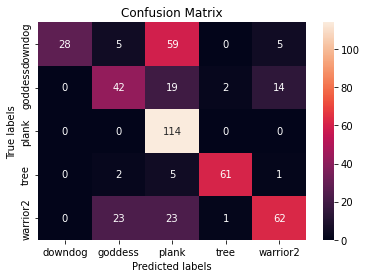

In [90]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrixCNN, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']); ax.yaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']);

# Prediction and visualization with SHAP (SHapley Additive exPlanations) 

SHAP is a Python library for explaining the predictions of machine learning models using the theory of Shapley values from cooperative game theory.

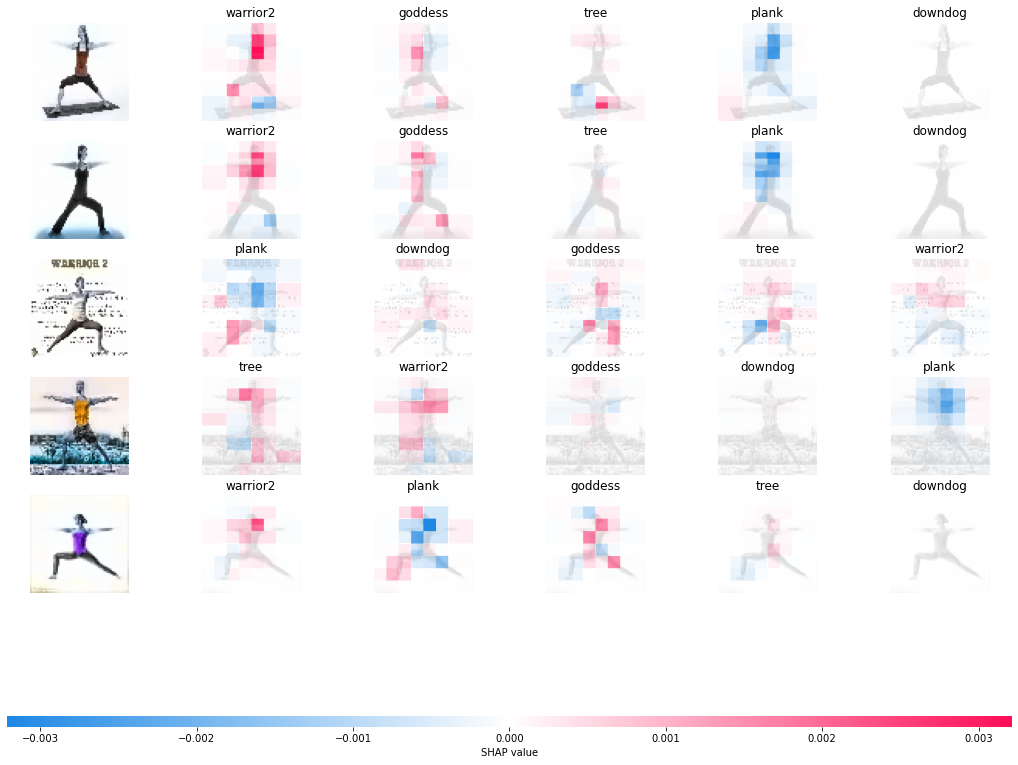

In [91]:
import shap
shap.initjs()
#Masker to mask parts of an image using blurring
masker = shap.maskers.Image("blur(64,64)", train_images_data[0].shape)
#Explainer() constructor by default creates an instance of Partition explainer
explainer = shap.Explainer(modelCNN, masker, output_names=class_names)
#generate shap values for images using the explainer object
shap_values = explainer(test_images_data[361:366], outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)

We Used the SHAP (SHapley Additive exPlanations) library to visualize the importance of different parts of an input image in the classification decision made by a pre-trained deep learning model.

First, this code imports the SHAP library and initializes the JavaScript visualization library.

Then, it creates a masker object that will be used to mask parts of an input image using blurring. The shape of the first image in the training data is used to specify the shape of the masker.

Next, it creates an explainer object using the model and masker. By default, the constructor creates an instance of Partition explainer.

Finally, it generates SHAP values for a subset of test images (indices 361 to 365) using the explainer object. The SHAP values are generated for the top 5 classes (based on highest probability), and these values are plotted using the image_plot function from the SHAP library. The resulting plot shows the importance of different parts of the input images for each of the top 5 classes.

# MobileNetV3

In [28]:
from tensorflow.keras.applications import MobileNetV3Small
input_shape = (224, 224, 3)
mobilenetv3_model = MobileNetV3Small(input_shape=input_shape, weights='imagenet', include_top=False)


In [31]:
from keras.utils import to_categorical
train_images_label1 = to_categorical(train_images_label, num_classes=class_num)
test_images_label1 = to_categorical(test_images_label, num_classes=class_num)

In [32]:
from tensorflow.keras.applications import MobileNetV3Small

# Create the model
mobileNetV3_model = MobileNetV3Small(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Resize the input images
resized_train_images_data = tf.image.resize(train_images_data, (224, 224))
resized_test_images_data = tf.image.resize(test_images_data, (224, 224))

# Normalize the input images
resized_train_images_data = resized_train_images_data / 255.0
resized_test_images_data = resized_test_images_data / 255.0

# Add a global spatial average pooling layer
x = mobileNetV3_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a fully connected layer with 128 hidden units and ReLU activation
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Add a dropout layer with rate 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final softmax layer for classification
predictions = tf.keras.layers.Dense(class_num, activation='softmax')(x)

# Combine the input and output layers to create the model
model_mobileNetV3 = tf.keras.Model(inputs=mobileNetV3_model.input, outputs=predictions)

# Compile the model
model_mobileNetV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mobileNetV3 = model_mobileNetV3.fit(resized_train_images_data, train_images_label1, epochs=epochs, validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 39s 1s/step - loss: 1.2669 - accuracy: 0.4942 - val_loss: 2.7136 - val_accuracy: 0.0000e+00
Epoch 2/20
27/27 [==============================] - 27s 991ms/step - loss: 0.6961 - accuracy: 0.7465 - val_loss: 3.5088 - val_accuracy: 0.0000e+00
Epoch 3/20
27/27 [==============================] - 27s 1s/step - loss: 0.5053 - accuracy: 0.8198 - val_loss: 3.9697 - val_accuracy: 0.0000e+00
Epoch 4/20
27/27 [==============================] - 29s 1s/step - loss: 0.3566 - accuracy: 0.8756 - val_loss: 4.6350 - val_accuracy: 0.0000e+00
Epoch 5/20
27/27 [==============================] - 28s 1s/step - loss: 0.2738 - accuracy: 0.9035 - val_loss: 6.5234 - val_accuracy: 0.0000e+00
Epoch 6/20
27/27 [==============================] - 29s 1s/step - loss: 0.1933 - accuracy: 0.9349 - val_loss: 7.8254 - val_accuracy: 0.0000e+00
Epoch 7/20
27/27 [==============================] - 29s 1s/step - loss: 0.2347 - accuracy: 0.9198 - val_loss: 9.6438 - val_accuracy: 

# Evaluation of the model

In [33]:
test_loss_mobilenetv3, test_acc_mobilenetv3 = model_mobileNetV3.evaluate(resized_test_images_data, test_images_label1)
print(f'Test accuracy for MobileNetV3: {test_acc_mobilenetv3}')

15/15 [==============================] - 4s 236ms/step - loss: 16.2018 - accuracy: 0.1652
Test accuracy for MobileNetV3: 0.16523605585098267


In [103]:
import shap
shap.initjs()

# VGG16

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np

vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg.layers:
    layer.trainable = False

# Resize the input images
resized_train_images_data = tf.image.resize(train_images_data, (224, 224))
resized_test_images_data = tf.image.resize(test_images_data, (224, 224))

# Normalize the input images
resized_train_images_data = resized_train_images_data / 255.0
resized_test_images_data = resized_test_images_data / 255.0

# Add the top layers to the base model
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.5)(x)
x = Dense(class_num, activation='softmax')(x)

# Compile the model
model = Model(inputs=vgg.input, outputs=x)
model.summary()

epochs = 20
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model on the training data
history_vgg16 = model.fit(
    resized_train_images_data,
    train_images_label,
    batch_size=16,
    epochs=epochs,
    validation_data=(resized_test_images_data, test_images_label))

# Print the accuracy and loss
val_acc = history_vgg16.history['val_accuracy']
acc = history_vgg16.history['accuracy']
val_loss = history_vgg16.history['val_loss']
loss = history_vgg16.history['loss']

print('------------------------------------------------------------------------')
print('Accuracy: ', val_acc)
print('Loss: ', val_loss)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# VGG16 evaluation

In [37]:
test_loss_modelvgg, test_acc_modelvgg = model.evaluate(resized_test_images_data, test_images_label)
print(f'Test accuracy for Model_vgg: {test_acc_modelvgg}')

15/15 [==============================] - 89s 6s/step - loss: 58.3221 - accuracy: 0.3433
Test accuracy for Model_vgg: 0.3433476388454437


# Prediction and Visualization with SHAP

In [ ]:
import shap
shap.initjs()
resized_test_images_data = []
for img in test_images_data:
    resized_img = resize(img, (224, 224), anti_aliasing=True)
    resized_test_images_data.append(resized_img)

#Masker to mask parts of an image using blurring
masker = shap.maskers.Image("blur(64,64)",  resized_test_images_data[0].shape)
#Explainer() constructor by default creates an instance of Partition explainer
explainer = shap.Explainer(model_mobileNetV3, masker, output_names=class_names)
#generate shap values for images using the explainer object
shap_values = explainer( resized_test_images_data[361:366], outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)

# Confusion matrix

In [78]:
from skimage.transform import resize

# Load and preprocess test images
test_images_data, test_images_label = preprocess_images(test_path)
test_images_label = encoding_targets(test_images_label)

# Resize test images to (224, 224)
resized_test_images_data = []
for img in test_images_data:
    resized_img = resize(img, (224, 224), anti_aliasing=True)
    resized_test_images_data.append(resized_img)

# Make predictions using the model
predict = np.argmax(model.predict(np.array(resized_test_images_data)), axis=1)

# Print evaluation metrics
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrix = confusion_matrix(test_images_label, predict)
print(cnf_matrix)
print("\nClassification Report :")
print(classification_report(test_images_label, predict, target_names=class_names))

15/15 [==============================] - 111s 6s/step
Test Data accuracy:  16.95278969957082

Confusion Matrix : 
[[11  0 76  9  1]
 [12  6 47  7  5]
 [21  1 50 26 16]
 [ 0  0 57 12  0]
 [ 9  0 96  4  0]]

Classification Report :
              precision    recall  f1-score   support

     downdog       0.21      0.11      0.15        97
     goddess       0.86      0.08      0.14        77
       plank       0.15      0.44      0.23       114
        tree       0.21      0.17      0.19        69
    warrior2       0.00      0.00      0.00       109

    accuracy                           0.17       466
   macro avg       0.28      0.16      0.14       466
weighted avg       0.25      0.17      0.14       466



# Using heatmap to visualize the coorelation between  true labels and predicted labels 

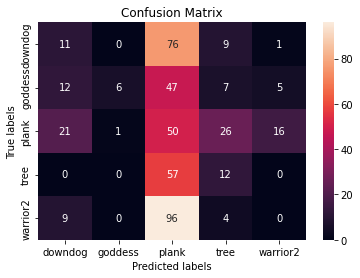

In [79]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']); ax.yaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']);

# Visualizing Training Histories for trained models

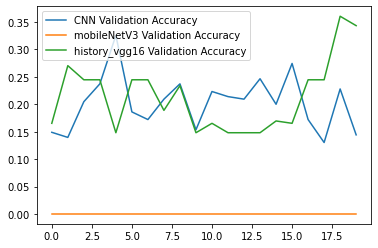

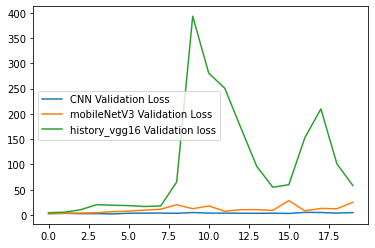

In [38]:
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_mobileNetV3.history['val_accuracy'], label='mobileNetV3 Validation Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='history_vgg16 Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.plot(history_mobileNetV3.history['val_loss'], label='mobileNetV3 Validation Loss')
plt.plot(history_vgg16.history['val_loss'], label='history_vgg16 Validation loss')
plt.legend()
plt.show()

# CNN model using the Keras API of TensorFlow using k-fold CV.

In [136]:
from tensorflow.keras.optimizers.legacy import Adam

In [137]:
#values of parameters used:
epochs = 20
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
modelCNN.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#  k-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.


In [138]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True,random_state=2)

# Training the model

In [139]:
# Define per-fold score containers
val_acc_per_fold = []
val_loss_per_fold = []
loss_per_fold = []
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, valid in kfold.split(train_images_data, train_images_label):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = modelCNN.fit(train_images_data[train], train_images_label[train], batch_size=16, 
                        epochs=epochs, validation_data=(train_images_data[valid], train_images_label[valid]))
    val_acc_per_fold.append(history.history['val_accuracy'])
    acc_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    loss_per_fold.append(history.history['loss'])
    # Increase fold number
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
54/54 [==============================] - 20s 126ms/step - loss: 0.8216 - accuracy: 0.7942 - val_loss: 0.6900 - val_accuracy: 0.8186
Epoch 2/20
54/54 [==============================] - 5s 83ms/step - loss: 0.2981 - accuracy: 0.8942 - val_loss: 0.6652 - val_accuracy: 0.8372
Epoch 3/20
54/54 [==============================] - 5s 84ms/step - loss: 0.2166 - accuracy: 0.9267 - val_loss: 0.4884 - val_accuracy: 0.8651
Epoch 4/20
54/54 [==============================] - 5s 84ms/step - loss: 0.1524 - accuracy: 0.9488 - val_loss: 0.5819 - val_accuracy: 0.8744
Epoch 5/20
54/54 [==============================] - 5s 87ms/step - loss: 0.1051 - accuracy: 0.9651 - val_loss: 0.5815 - val_accuracy: 0.8326
Epoch 6/20
54/54 [==============================] - 5s 84ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.7283 - val_accuracy: 0.8233
Epoch 7/20
54/54 [==============================] - 4s 

# Accuracy

In [140]:
print(f'> Mean_Training_Accuracy: {np.mean(acc_per_fold)*100} (+- {np.std(acc_per_fold)})')
print(f'> Mean_Validation_Accuracy: {np.mean(val_acc_per_fold)*100} (+- {np.std(val_acc_per_fold)})')

> Mean_Training_Accuracy: 98.15348827838898 (+- 0.02488496021916538)
> Mean_Validation_Accuracy: 94.89767426252365 (+- 0.08191714422763005)


# Data augmentation using Keras' ImageDataGenerator

In [141]:
from keras.preprocessing.image import ImageDataGenerator
dataAugmentaion = ImageDataGenerator(rotation_range = 10, zoom_range = 0.30, 
                                        fill_mode = "nearest", shear_range = 0.30)

# Training the model

In [142]:
# Define per-fold score containers
val_acc_per_fold = []
val_loss_per_fold = []
loss_per_fold = []
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, valid in kfold.split(train_images_data, train_images_label):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = modelCNN.fit_generator(dataAugmentaion.flow(train_images_data[train], train_images_label[train], batch_size=16),
                                  epochs=epochs,
                                  validation_data=(train_images_data[valid], train_images_label[valid]))
    val_acc_per_fold.append(history.history['val_accuracy'])
    acc_per_fold.append(history.history['accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])
    loss_per_fold.append(history.history['loss'])
    # Increase fold number
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...


`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
54/54 [==============================] - 5s 81ms/step - loss: 1.5343 - accuracy: 0.6860 - val_loss: 1.1331 - val_accuracy: 0.7581
Epoch 2/20
54/54 [==============================] - 4s 80ms/step - loss: 1.1657 - accuracy: 0.7058 - val_loss: 0.5452 - val_accuracy: 0.8326
Epoch 3/20
54/54 [==============================] - 5s 85ms/step - loss: 0.9479 - accuracy: 0.7547 - val_loss: 0.1169 - val_accuracy: 0.9535
Epoch 4/20
54/54 [==============================] - 4s 80ms/step - loss: 0.7990 - accuracy: 0.7570 - val_loss: 0.1214 - val_accuracy: 0.9628
Epoch 5/20
54/54 [==============================] - 5s 84ms/step - loss: 0.6016 - accuracy: 0.8000 - val_loss: 0.1466 - val_accuracy: 0.9628
Epoch 6/20
54/54 [==============================] - 4s 82ms/step - loss: 0.6977 - accuracy: 0.7802 - val_loss: 0.2213 - val_accuracy: 0.9302
Epoch 7/20
54/54 [==============================] - 4s 81ms/step - loss: 0.5752 - accuracy: 0.8128 - val_loss: 0.2029 - val_accuracy: 0.9442
Epoch 8/20
54

# Plotting the train and validation loss across 5 folds of the cross-validation process 

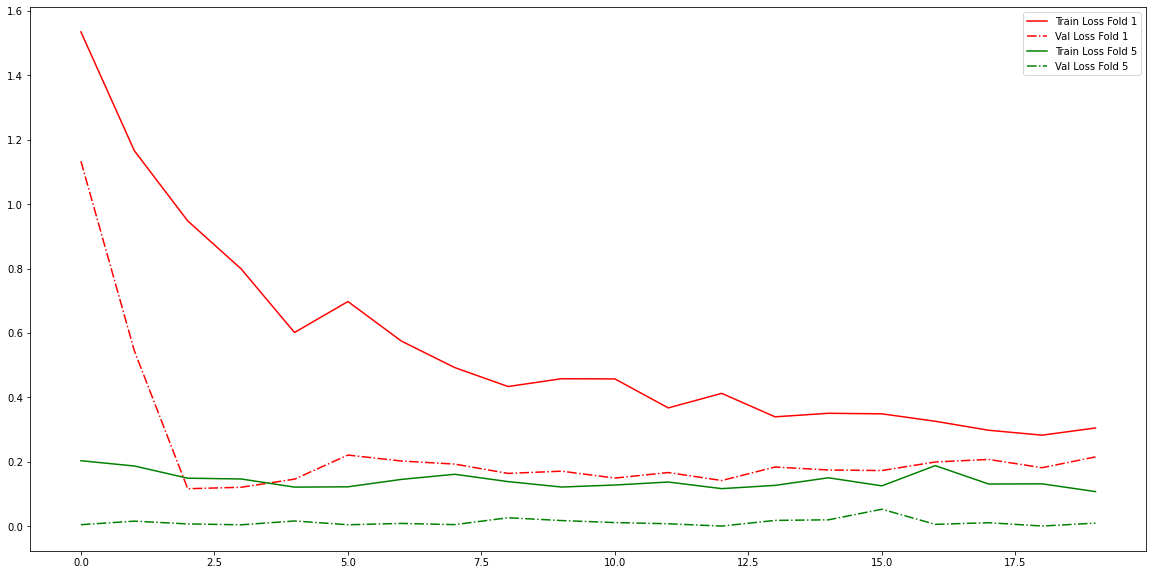

In [143]:
plt.figure(figsize=(20, 10))
plt.plot(loss_per_fold[0], label='Train Loss Fold 1', color='red')
plt.plot(val_loss_per_fold[0], label='Val Loss Fold 1', color='red', linestyle = "dashdot")
plt.plot(loss_per_fold[4], label='Train Loss Fold 5', color='green')
plt.plot(val_loss_per_fold[4], label='Val Loss Fold 5', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

# Confusion matrix

In [144]:
test_images_data, test_images_label = preprocess_images(test_path)
test_images_label = encoding_targets(test_images_label)
predict = np.argmax(modelCNN.predict(np.array(test_images_data)),axis=1)
print('Test Data accuracy: ',accuracy_score(test_images_label, predict)*100)
print("\nConfusion Matrix : ")
cnf_matrix = confusion_matrix(test_images_label, predict)
print(cnf_matrix)
print("\nClassification Report :")
print(classification_report(test_images_label, predict, target_names=class_names))

15/15 [==============================] - 1s 39ms/step
Test Data accuracy:  89.91416309012875

Confusion Matrix : 
[[ 91   0   6   0   0]
 [  0  58   8   1  10]
 [  2   2 105   2   3]
 [  0   1   1  66   1]
 [  0   7   2   1  99]]

Classification Report :
              precision    recall  f1-score   support

     downdog       0.98      0.94      0.96        97
     goddess       0.85      0.75      0.80        77
       plank       0.86      0.92      0.89       114
        tree       0.94      0.96      0.95        69
    warrior2       0.88      0.91      0.89       109

    accuracy                           0.90       466
   macro avg       0.90      0.90      0.90       466
weighted avg       0.90      0.90      0.90       466



# Using heatmap to visualize the coorelation between  true labels and predicted labels 

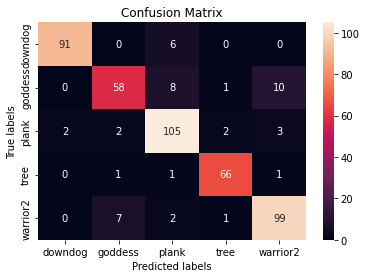

In [145]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']); ax.yaxis.set_ticklabels(['downdog', 'goddess','plank','tree','warrior2']);

# Prediction with CNN model using the Keras API of TensorFlow using k-fold CV

In [147]:
#Prediction:
poses_mapping = {0: 'downdog', 1: 'goddess', 2: 'plank', 3: 'tree', 4: 'warrior2'}
result = modelCNN.predict(test_images_data)
print("Predicted pose:", poses_mapping[np.argmax(result[0])])
print("Actual pose:", poses_mapping[np.argmax(test_images_data[4])])

15/15 [==============================] - 0s 22ms/step
Predicted pose: downdog
Actual pose: downdog


# Prediction and visualization with SHAP (SHapley Additive exPlanations) 

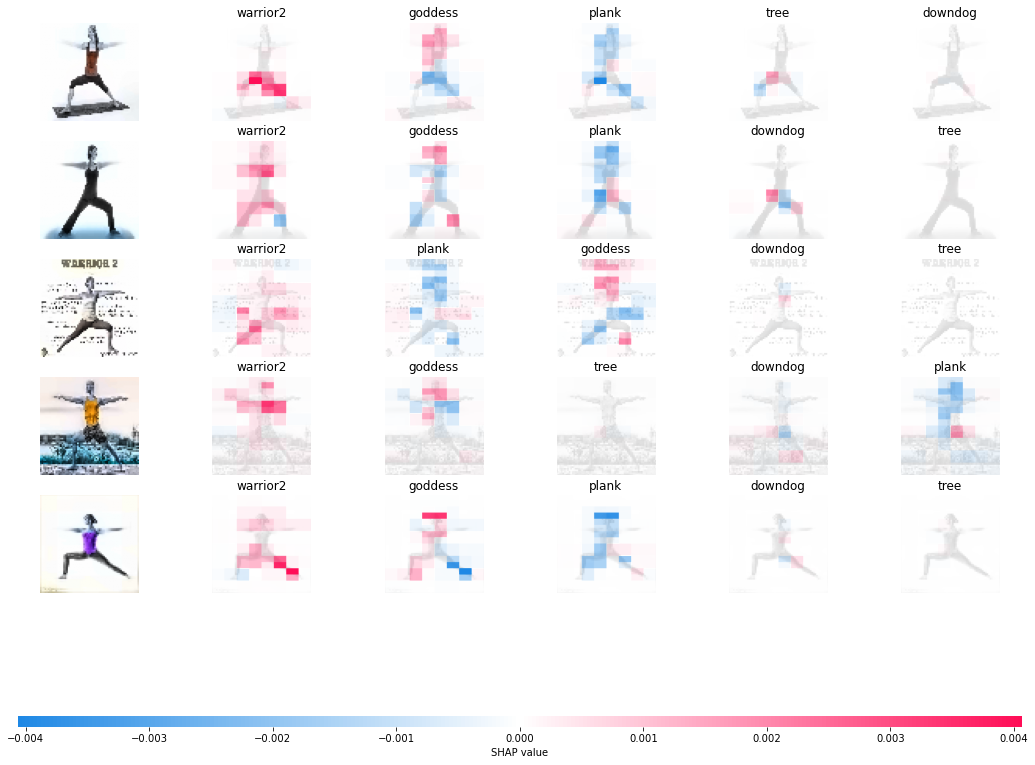

In [146]:
import shap
shap.initjs()
#Masker to mask parts of an image using blurring
masker = shap.maskers.Image("blur(64,64)", train_images_data[0].shape)
#Explainer() constructor by default creates an instance of Partition explainer
explainer = shap.Explainer(modelCNN, masker, output_names=class_names)
#generate shap values for images using the explainer object
shap_values = explainer(test_images_data[361:366], outputs=shap.Explanation.argsort.flip[:5])
shap.image_plot(shap_values)